In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

Read data from github

In [3]:
## read in spotted lanternfly dataset 
data_url = "https://raw.githubusercontent.com/DataScienceTempleFirst/code-cod/main/spotted_lanternfly.csv"
spotted_lanternfly = Table.read_table(data_url)
spotted_lanternfly.show()

Environment,Spotted Lanternfly Observed
Urban,55
Urban,120
Urban,105
Urban,196
Urban,244
Urban,117
Urban,194
Urban,230
Urban,165
Urban,61


Look at hypothesis that more Spotted Lanterfly's are observed in rural environment

In [4]:
## how many locations in each of the environment
spotted_lanternfly.group('Environment')

Environment,count
Rural,85
Urban,45


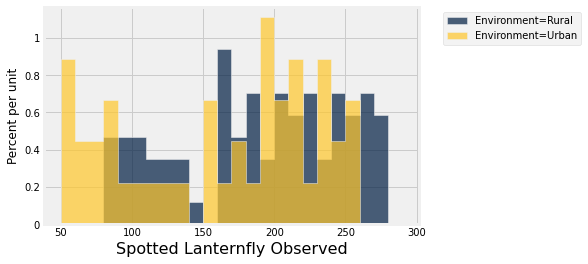

In [10]:
## draw histogram
spotted_lanternfly.hist('Spotted Lanternfly Observed', group = 'Environment', bins = np.arange(50, 300, 10) )

In [12]:
## create table with average number of observed lanternflies
table_of_means = spotted_lanternfly.group('Environment', np.average)
table_of_means

Environment,Spotted Lanternfly Observed average
Rural,190.165
Urban,162.467


In [14]:
## extract the difference in means
mean_column = table_of_means.column(1)
observed_difference = mean_column.item(0) - mean_column.item(1)
observed_difference

27.698039215686265

In [18]:
#### Shuffle all the values
slf_obs = spotted_lanternfly.select('Spotted Lanternfly Observed')
shuffled_obs = slf_obs.sample(with_replacement = False).column(0)
shuffled_obs

array([198, 272, 118, 122, 210, 187, 209, 176,  92, 235, 217, 247, 172,
       259, 267, 196,  93,  93,  52, 163, 155, 140, 131, 129, 164, 205,
       239,  51, 195, 245, 194, 160,  92, 272, 246,  55, 218, 209, 127,
       209, 185, 210, 225, 112, 224, 154, 207, 237, 244, 132, 257, 263,
       207, 164, 131,  87, 133, 273,  62, 252, 251,  81, 184, 194, 247,
       223, 117, 255,  51, 274, 187, 120, 205, 222, 195, 201, 106, 176,
       259, 249, 245, 119,  76, 262, 176, 150, 230, 237, 164, 229, 267,
       186, 164, 225, 171, 165, 256, 212,  77, 231, 187, 234, 167, 264,
       162, 269, 105, 210, 200, 213,  95,  82,  82, 173,  85, 105,  81,
       246, 254,  61, 270, 214,  85, 181, 199, 192, 102, 225, 108, 212])

In [19]:
### assign some of these values to group A and the rest of group B (using same sample sizes)
add_shuffled = spotted_lanternfly.with_column('Shuffled Observations', shuffled_obs)
add_shuffled

Environment,Spotted Lanternfly Observed,Shuffled Observations
Urban,55,198
Urban,120,272
Urban,105,118
Urban,196,122
Urban,244,210
Urban,117,187
Urban,194,209
Urban,230,176
Urban,165,92
Urban,61,235


In [20]:
### find the difference between the averages of two shuffled groups
single_mean_table = add_shuffled.group("Environment", np.average)
single_mean_table

Environment,Spotted Lanternfly Observed average,Shuffled Observations average
Rural,190.165,182.412
Urban,162.467,177.111


In [22]:
single_mean_table.column(2).item(0) - single_mean_table.column(2).item(1)

5.300653594771234

In [ ]:
### SIMULATION

In [27]:
differences = make_array()
reps = 2000

for i in np.arange(reps):
    ### STEP 1: array of shuffled observations
    shuffled_obs = slf_obs.sample(with_replacement = False).column(0)
    
    ### STEP 2: assign to either group 
    add_shuffled = spotted_lanternfly.with_column('Shuffled Observations', shuffled_obs)

    ### STEP 3: find difference between means
    mean_table = add_shuffled.group("Environment", np.average).column(2)
    simulated_diff = mean_table.item(1) - mean_table.item(0)
    
    ## STEP 4: repeat
    differences = np.append(differences, simulated_diff)


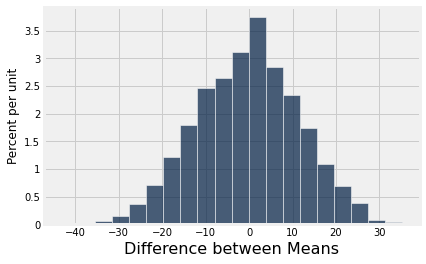

In [28]:
## STEP 5: draw a histogram
Table().with_column('Difference between Means', differences).hist(bins = 20, ec = 'w')

In [25]:
observed_difference

27.698039215686265

In [29]:
np.count_nonzero(differences >= observed_difference) / reps

0.0045